In [1]:
import time
import numpy as np

from knlms import *
from krls import *
from klms import *
from klms_rff import *

In [12]:
num_experiments = 25
gauss_kernel = lambda u_i,u_j: np.exp(-3.73 * (np.linalg.norm(u_i - u_j,ord=2)**2))
kernel = gauss_kernel
step_size = 0.09
reg_coeff = 0.03
threshold = 0.5

In [9]:
num_data = 3000

def generate_data(num_data):
    # AWGN
    v = 0.1*np.random.normal(0,1,num_data+2) 

    # Initial conditions
    d_true =[0.1 , 0.1]
    d = [d_true[0] + v[0], d_true[1] + v[1]]

    # Grab new data
    new_d_true = lambda d: d.append((0.8 - 0.5 * np.exp(-(d[-1]**2)))*d[-1] - (0.3 + 0.9*np.exp(-(d[-1]**2)))*d[-2] + 0.1*np.sin(np.pi*d[-1]))
    for i in range(2,num_data+2):
        new_d_true(d_true)
        d.append(d_true[-1] + v[i])

    u = np.hstack((np.array(d[0:num_data]).reshape(num_data,1),np.array(d[1:num_data+1]).reshape(num_data,1)))
    d_true = d_true[2::]
    d = d[2::]
    return np.array(u), np.array(d),np.array(d_true)

In [16]:
time_dataKNLMS = np.array([])
time_dataRFFKNLMS = np.array([])

In [50]:
numExipraments = 25
endTime = 0

for i in range(0,numExipraments):
    u,d,d_true = generate_data(num_data)
    
    start_KNLMS = time.time()
    err_KNLMS = KNLMS(u,d,kernel,step_size,reg_coeff,0.5)
    endTime = (time.time() - start_KNLMS)
    print(endTime)
    np.append(time_dataKNLMS,endTime)
    
    start_RFFKNLMS = time.time()
    err_RFFKNLMS = KLMS_RFF(u,d,kernel,step_size,20)
    np.append(time_dataRFFKNLMS,time.time() - start_RFFKNLMS)

3.346184015274048
3.4121181964874268
3.4400954246520996
3.309471607208252
3.4457788467407227
3.2351748943328857
3.2072277069091797
3.4709842205047607
3.725843906402588
3.2342653274536133
3.319391965866089
3.7712855339050293
3.171212673187256
3.7928338050842285
3.5570740699768066
3.4195616245269775
3.5125858783721924
3.49715256690979
3.3619542121887207
4.426346778869629
4.1938066482543945
3.4499568939208984
3.641465187072754
3.4512171745300293
3.6479086875915527


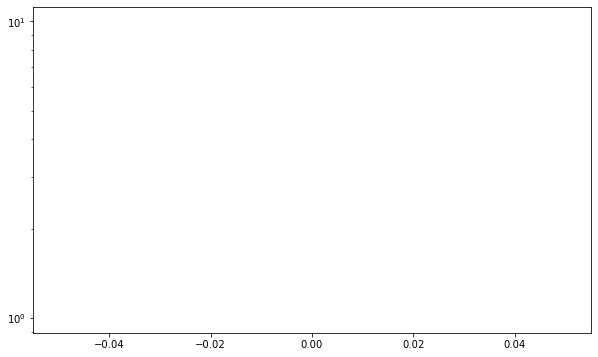

In [34]:
plt.figure(figsize=(10, 6))
plt.semilogy(range(len(time_dataKNLMS)),time_dataKNLMS, label='KNLMS')
plt.semilogy(range(len(time_dataRFFKNLMS)),time_dataRFFKNLMS, label='KRLS')

In [61]:
for i in range(len(time_dataRFFKNLMS)):
    print(time_dataKNLMS[i])